In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True, )
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True, cache_dir='./')

68608000/68606236 [==============================] - 0s 0us/step


In [3]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
PATH, train_dir, validation_dir

('./datasets/cats_and_dogs_filtered',
 './datasets/cats_and_dogs_filtered/train',
 './datasets/cats_and_dogs_filtered/validation')

In [4]:
# train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
# train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
# validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# num_cats_tr = len(os.listdir(train_cats_dir))
# num_dogs_tr = len(os.listdir(train_dogs_dir))

# num_cats_val = len(os.listdir(validation_cats_dir))
# num_dogs_val = len(os.listdir(validation_dogs_dir))

# total_train = num_cats_tr + num_dogs_tr
# total_val = num_cats_val + num_dogs_val
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
sample_training_images, _ = next(train_data_gen)
sample_training_images.shape

(128, 150, 150, 3)

In [7]:
model = tf.keras.models.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
    # Dense(1, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [19]:
hist = model.fit(
    train_data_gen,
    batch_size=256,
    # steps_per_epoch=total_train // batch_size,
    epochs=5,
    # validation_data=val_data_gen
    # ,validation_steps=total_val // batch_size
)

Epoch 1/5
16/16 [==============================] - 53s 3s/step - loss: 0.5969 - accuracy: 0.6595
Epoch 2/5
16/16 [==============================] - 53s 3s/step - loss: 0.6318 - accuracy: 0.6135
Epoch 3/5
16/16 [==============================] - 53s 3s/step - loss: 0.6190 - accuracy: 0.6220
Epoch 4/5
16/16 [==============================] - 53s 3s/step - loss: 0.6001 - accuracy: 0.6505
Epoch 5/5
16/16 [==============================] - 53s 3s/step - loss: 0.6013 - accuracy: 0.6540


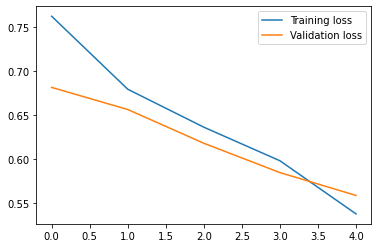

In [10]:
import matplotlib.pyplot as plt
plt.plot(hist.epoch, hist.history['loss'], label='Training loss')
plt.plot(hist.epoch, hist.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

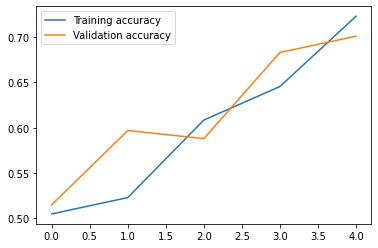

In [11]:
plt.plot(hist.epoch, hist.history['accuracy'], label='Training accuracy')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

#Need Data augmentation

In [12]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))



Found 2000 images belonging to 2 classes.


In [13]:
# plt.imshow(train_data_gen[6])
# train_data_gen[6]

In [14]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [15]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


Put it all together
Apply all the previous augmentations. Here, you applied rescale, 45 degree rotation, width shift, height shift, horizontal flip and zoom augmentation to the training images

In [16]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [17]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


##Dropout

In [18]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

NameError: ignored

In [ ]:
hist_new = model_new.fit(
    train_data_gen,
    batch_size=256,
    # steps_per_epoch=total_train // batch_size,
    epochs=5,
    validation_data=val_data_gen
    # ,validation_steps=total_val // batch_size
)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist_new.epoch, hist_new.history['loss'], label='Training loss')
plt.plot(hist_new.epoch, hist_new.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(hist_new.epoch, hist_new.history['accuracy'], label='Training accuracy')
plt.plot(hist_new.epoch, hist_new.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()